In [57]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

In [58]:
# Read the CSV file into a Pandas DataFrame
kidney_df_cleaned = pd.read_csv("merged/10_Year_cleaned.csv")
kidney_df_cleaned

,Unnamed: 0,Transplant Year,Age Group,N,Graft_Survival_Rate,Patient Survival Rate,All ABO,O,A,B,...,Retransplant/Graft Failure,Tubular and Interstitial Diseases,"White, Non-Hispanic","Black, Non-Hispanic",Hispanic/Latino,Unknown,"Asian, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Pacific Islander, Non-Hispanic","Multiracial, Non-Hispanic"
0,0,2012,<1 Year,2,0.00,0.00,2,2,0,0,...,0,0,159,45,51,0,17,0,1,4
1,1,2012,1-5 Years,174,79.30,95.01,187,96,60,19,...,0,13,285,93,108,0,21,3,1,8
2,2,2012,11-17 Years,384,61.34,94.87,139,66,49,19,...,6,10,143,49,66,0,18,1,1,3
3,3,2012,6-10 Years,124,77.09,97.46,430,210,149,56,...,20,40,374,112,174,1,19,9,0,7
4,4,2012,18-34,1721,63.07,87.54,2151,1000,781,264,...,205,129,1642,682,577,1,159,20,8,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,1988,11-17 Years,271,42.61,88.21,407,182,163,44,...,3,62,356,103,62,3,11,4,0,0
196,196,1988,18-34,2076,51.50,76.69,2794,1286,1060,322,...,10,235,2419,603,303,3,83,16,7,0
197,197,1988,35-49,2579,43.03,59.08,3289,1486,1274,383,...,8,201,3196,838,291,5,109,43,1,0
198,198,1988,50-64,1654,35.82,41.65,1926,876,730,232,...,2,112,2487,490,179,6,60,20,3,0


In [59]:
good_survival = pd.cut( kidney_df_cleaned["Patient Survival Rate"], [-1, 60, 80, 90, 100], labels=["D", "C", "B", "A"])
good_survival

0      D
1      A
2      A
3      A
4      B
      ..
195    B
196    C
197    D
198    D
199    D
Name: Patient Survival Rate, Length: 200, dtype: category
Categories (4, object): ['D' < 'C' < 'B' < 'A']

In [60]:
kidney_df_cleaned["Patient_Survival_status"] = good_survival
Y = kidney_df_cleaned["Patient_Survival_status"]
X = kidney_df_cleaned.drop(columns=['Unnamed: 0', 'N', 'Patient Survival Rate', 'Transplant Year', 'Patient_Survival_status'])

In [61]:
X = pd.get_dummies(X)
X

,Graft_Survival_Rate,All ABO,O,A,B,AB,"Congenital, Rare, Familial, and Metaboli",Diabetes,Glomerular Disease,Hypertensive Nephrosclerosis,...,"Pacific Islander, Non-Hispanic","Multiracial, Non-Hispanic",Age Group_1-5 Years,Age Group_11-17 Years,Age Group_18-34,Age Group_35-49,Age Group_50-64,Age Group_6-10 Years,Age Group_65+,Age Group_<1 Year
0,0.00,2,2,0,0,0,1,0,0,0,...,1,4,0,0,0,0,0,0,0,1
1,79.30,187,96,60,19,12,79,0,17,1,...,1,8,1,0,0,0,0,0,0,0
2,61.34,139,66,49,19,5,43,0,27,1,...,1,3,0,1,0,0,0,0,0,0
3,77.09,430,210,149,56,15,105,1,129,8,...,0,7,0,0,0,0,0,1,0,0
4,63.07,2151,1000,781,264,106,102,90,939,283,...,8,16,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,42.61,407,182,163,44,18,76,0,177,8,...,0,0,0,1,0,0,0,0,0,0
196,51.50,2794,1286,1060,322,125,88,593,1220,199,...,7,0,0,0,1,0,0,0,0,0
197,43.03,3289,1486,1274,383,146,32,780,1104,465,...,1,0,0,0,0,1,0,0,0,0
198,35.82,1926,876,730,232,88,2,333,561,374,...,3,0,0,0,0,0,1,0,0,0


In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
X_train.shape

(150, 33)

In [63]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
X_train_scaled

array([[ 0.40959704, -0.8238421 , -0.82753301, ...,  2.62578309,
        -0.39223227, -0.36927447],
       [ 0.00631123, -0.67710687, -0.67643142, ..., -0.38083877,
        -0.39223227, -0.36927447],
       [-0.7735283 , -0.41098489, -0.44269616, ..., -0.38083877,
         2.54950976, -0.36927447],
       ...,
       [-2.16129238, -0.89010963, -0.89836188, ..., -0.38083877,
        -0.39223227,  2.7080128 ],
       [ 0.17039094,  0.48993792,  0.54300558, ..., -0.38083877,
        -0.39223227, -0.36927447],
       [ 0.88708744,  1.45555046,  1.46141989, ..., -0.38083877,
        -0.39223227, -0.36927447]])

In [64]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, Y_train)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
acc_score = accuracy_score(Y_test, predictions)


In [65]:
print(f"Accuracy Score : {acc_score}")
print(classification_report(Y_test, predictions))

Accuracy Score : 0.86
              precision    recall  f1-score   support

           A       0.85      0.73      0.79        15
           B       0.69      0.75      0.72        12
           C       0.83      1.00      0.91         5
           D       1.00      1.00      1.00        18

    accuracy                           0.86        50
   macro avg       0.84      0.87      0.85        50
weighted avg       0.86      0.86      0.86        50



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

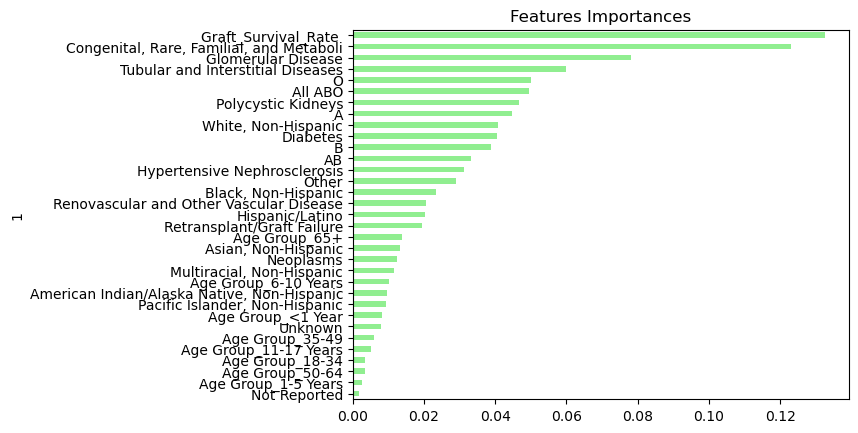

In [66]:
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)